In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
IndexedDataset = dataset.set_index(dataset['Month'])
IndexedDataset.drop(['Month'],axis=1,inplace=True)
IndexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
from datetime import datetime
IndexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


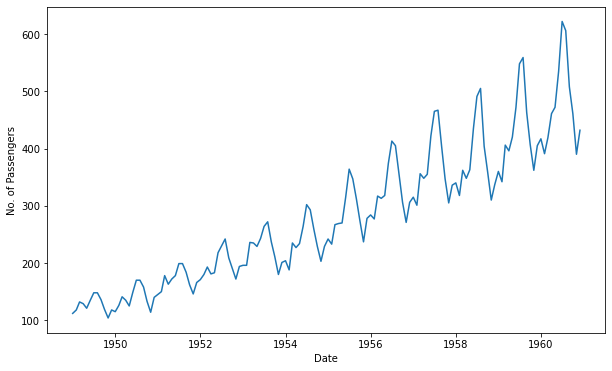

In [5]:
#plotting the data graph
plt.xlabel('Date')
plt.ylabel('No. of Passengers')
plt.plot(IndexedDataset)

In [6]:
# Implementating Rolling Statistics

rollmean = IndexedDataset.rolling(window=12).mean()
rollstd = IndexedDataset.rolling(window=12).std()
rollmean,rollstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01   463.333333
 1960-09-01   467.083333
 1960-10-01   471.583333
 1960-11-01   473.916667
 1960-12-01   476.166667
 
 [144 rows x 1 columns],
             #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 ...                 ...
 1960-08-01    83.630500
 1960-09-01    84.617276
 1960-10-01    82.541954
 1960-11-01    79.502382
 1960-12-01    77.737125
 
 [144 rows x 1 columns])

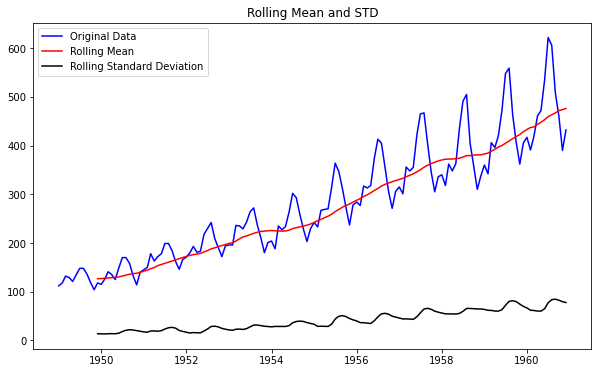

In [7]:
org = plt.plot(IndexedDataset,color='blue',label='Original Data')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')
std = plt.plot(rollstd,color='black',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and STD')
plt.show(block=False)

In [8]:
# Performing Dickey-Fuller Test for checking Stationarity of Data

from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(IndexedDataset['#Passengers'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags found','Number of Obsr used'])
for key,value in dftest[4].items():
    dfoutput['Critical-Value (%s)'%key]=value
dfoutput

Result of Dickey Fuller Test


Test Statistics           0.815369
p-value                   0.991880
#lags found              13.000000
Number of Obsr used     130.000000
Critical-Value (1%)      -3.481682
Critical-Value (5%)      -2.884042
Critical-Value (10%)     -2.578770
dtype: float64

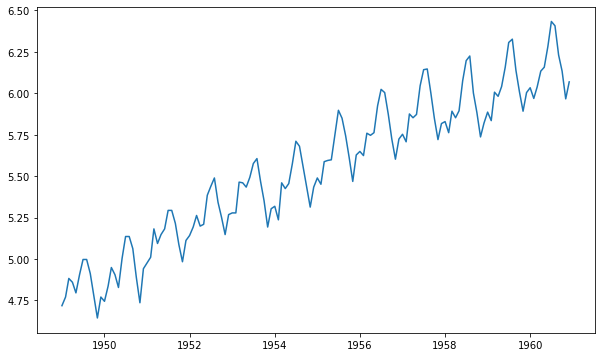

In [9]:
#estimating trend
IndexedDataset_logtrend = np.log(IndexedDataset)
plt.plot(IndexedDataset_logtrend)

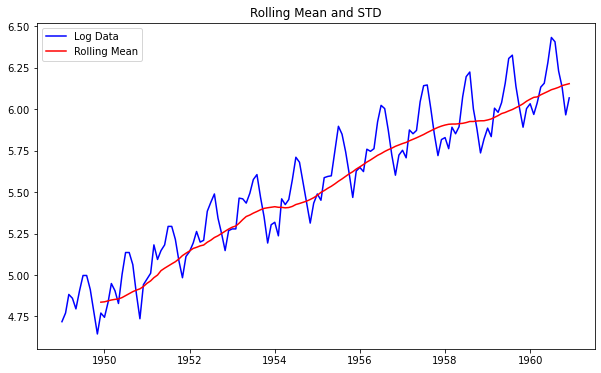

In [10]:
# rolling test on log data
rollmean_log = IndexedDataset_logtrend.rolling(window=12).mean()
rollstd_log = IndexedDataset_logtrend.rolling(window=12).std()
org_log = plt.plot(IndexedDataset_logtrend,color='blue',label='Log Data')
mean_log = plt.plot(rollmean_log,color='red',label='Rolling Mean')
#std_log = plt.plot(rollstd_log,color='black',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and STD')
plt.show(block=False)

In [11]:
dataset_logvalue_minus_moving_avg = IndexedDataset_logtrend - rollmean_log
#removing NAN value
dataset_logvalue_minus_moving_avg.dropna(inplace=True)
dataset_logvalue_minus_moving_avg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [12]:
#function to check stationarity of dataset
def test_stationarity(timeseries):
    moving_mean = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    #rolling test
    orig = plt.plot(timeseries,color='blue',label='Original Data')
    mean = plt.plot(moving_mean,color='red',label='Rolling Mean')
    std = plt.plot(moving_std,color='black',label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and STD')
    plt.show(block=False)
    
    #Dickey- Fuller Test
    print("Result of Dickey Fuller Test")
    dftest = adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','#lags found','Number of Obsr used'])
    for key,value in dftest[4].items():
        dfoutput['Critical-Value (%s)'%key]=value
    print(dfoutput)

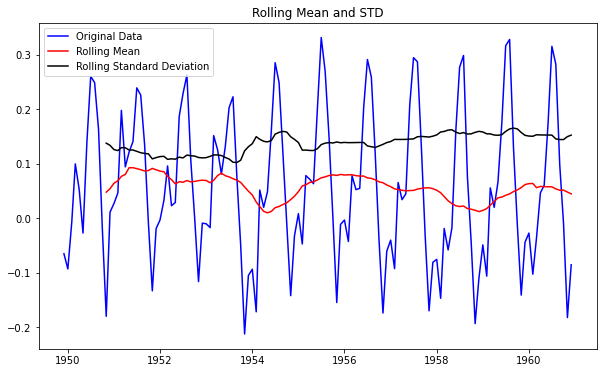

Result of Dickey Fuller Test
Test Statistics          -3.162908
p-value                   0.022235
#lags found              13.000000
Number of Obsr used     119.000000
Critical-Value (1%)      -3.486535
Critical-Value (5%)      -2.886151
Critical-Value (10%)     -2.579896
dtype: float64


In [13]:
#testing for stationarity on log_valued-moving_avg data
test_stationarity(dataset_logvalue_minus_moving_avg)

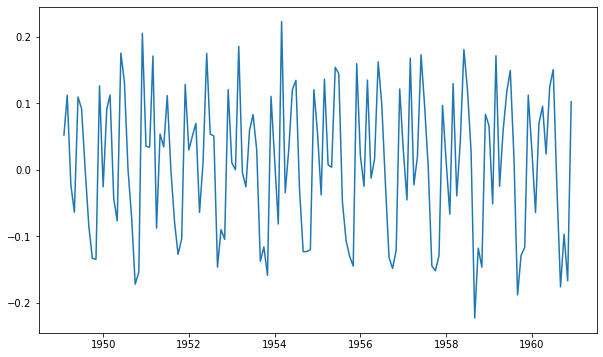

In [14]:
dataset_logshifted = IndexedDataset_logtrend - IndexedDataset_logtrend.shift()
plt.plot(dataset_logshifted)

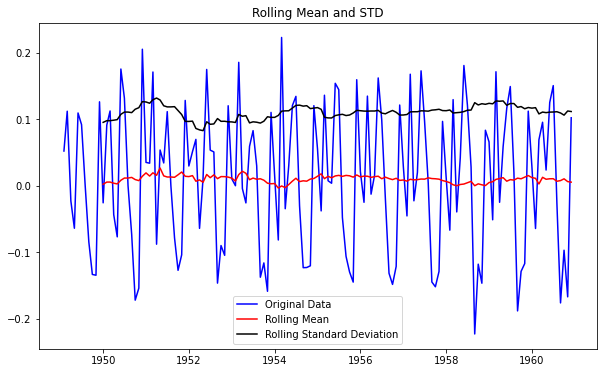

Result of Dickey Fuller Test
Test Statistics          -2.717131
p-value                   0.071121
#lags found              14.000000
Number of Obsr used     128.000000
Critical-Value (1%)      -3.482501
Critical-Value (5%)      -2.884398
Critical-Value (10%)     -2.578960
dtype: float64


In [15]:
dataset_logshifted.dropna(inplace=True)
test_stationarity(dataset_logshifted)

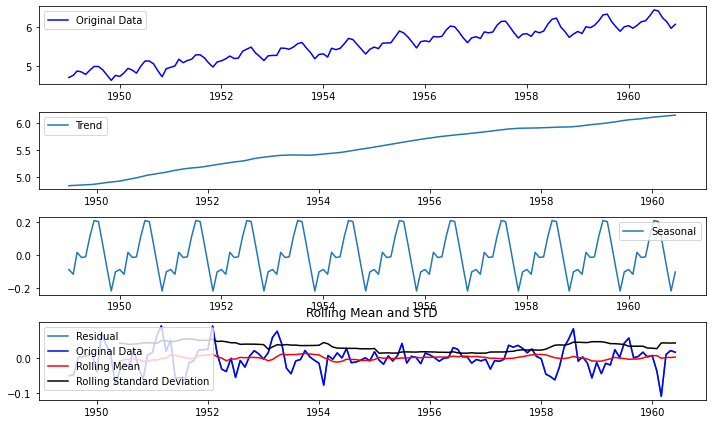

Result of Dickey Fuller Test
Test Statistics        -6.332387e+00
p-value                 2.885059e-08
#lags found             9.000000e+00
Number of Obsr used     1.220000e+02
Critical-Value (1%)    -3.485122e+00
Critical-Value (5%)    -2.885538e+00
Critical-Value (10%)   -2.579569e+00
dtype: float64


In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IndexedDataset_logtrend)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(IndexedDataset_logtrend,color='blue',label='Original Data')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
dataframe = pd.Series.to_frame(decomposedlogdata)
dataframe.columns=['#Passengers']
test_stationarity(dataframe)

In [30]:
from statsmodels.tsa.stattools import pacf,acf

In [31]:
lag_acf=acf(dataset_logshifted,nlags=20)
lag_pacf = pacf(dataset_logshifted,nlags=20,method='ols')

C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


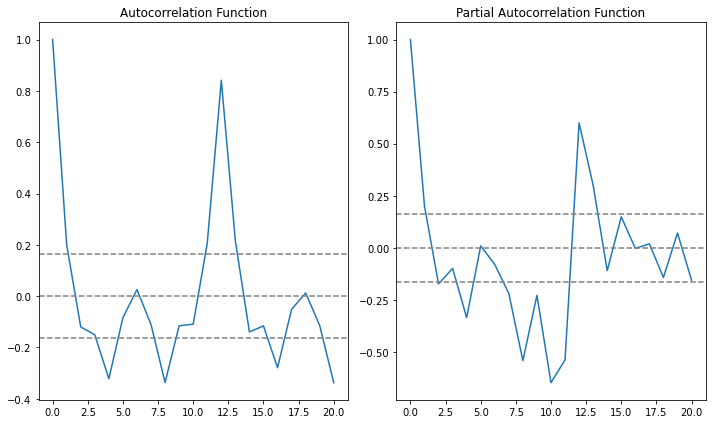

In [34]:
#plotting ACF graph
plt.subplot(121)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logshifted)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dataset_logshifted)),linestyle='--',color='grey')

#plot PACF graph
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation Function')
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataset_logshifted)),linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(dataset_logshifted)),linestyle='--',color='grey')
plt.tight_layout()

C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


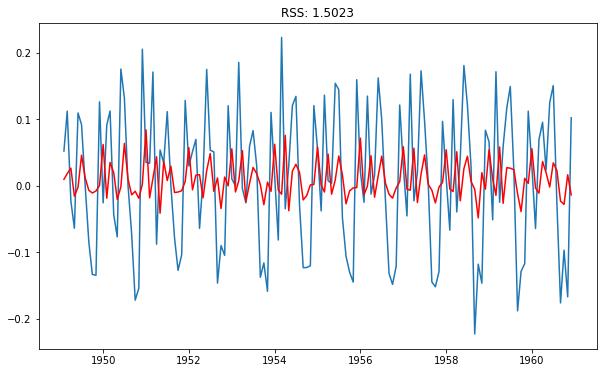

In [38]:
# Arima Model
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(IndexedDataset_logtrend,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dataset_logshifted)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataset_logshifted['#Passengers'])**2))
print('Plotting AR model')

C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


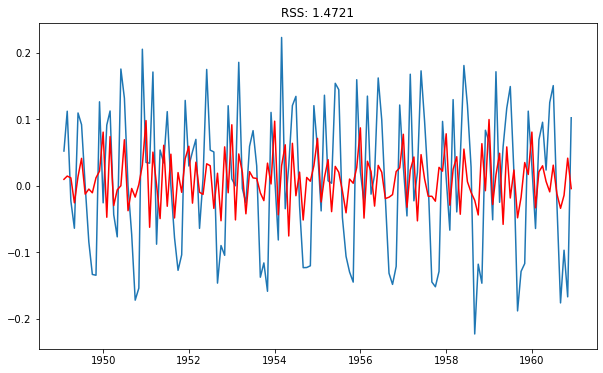

In [39]:
#AR model
model = ARIMA(IndexedDataset_logtrend,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dataset_logshifted)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataset_logshifted['#Passengers'])**2))
print('Plotting MA model')

C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Sc0ut07\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


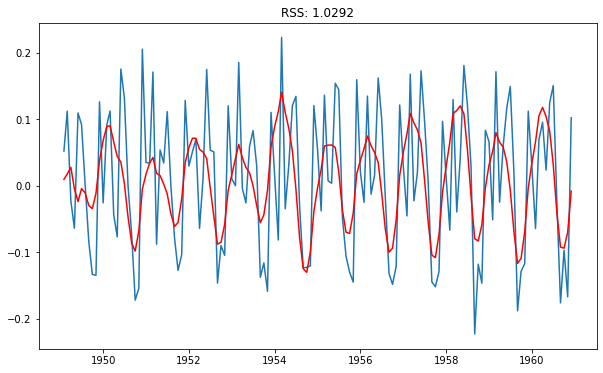

In [40]:
# combined model ARIMA
#AR model
model = ARIMA(IndexedDataset_logtrend,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_logshifted)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataset_logshifted['#Passengers'])**2))
print('Plotting ARIMA model')

In [41]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
prediction_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

In [42]:
#convert to cumulative sum
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
prediction_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [46]:
predictions_ARIMA_log = pd.Series(IndexedDataset_logtrend['#Passengers'].iloc[0],index=IndexedDataset_logtrend.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

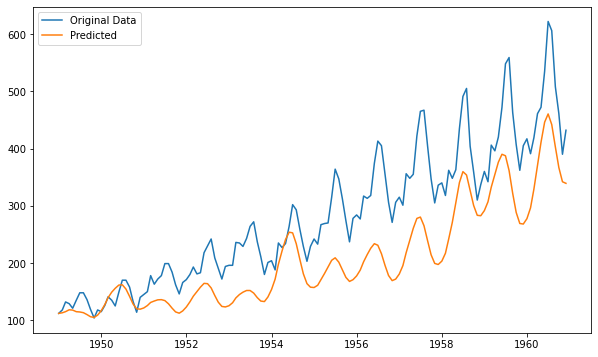

In [51]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(IndexedDataset,label='Original Data')
plt.plot(predictions_ARIMA,label='Predicted')
plt.legend()

In [48]:
IndexedDataset_logtrend

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


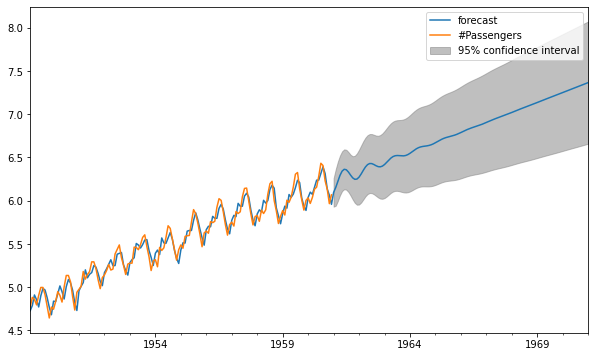

In [52]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)